# Compartment models

This topic builds on our previous work on using the $\verb|random|$ library for stochastic simulations. This case study is something you will have seen a lot in the context of COVID: a **compartment model** where individuals are either susceptible (S), infected (I) or recovered (R), and the way people move between these 'compartments' models an epidemic. Compartment models are a very **general modelling technique** - try to think of an example from an organisation that may be amenable to such a modelling approach. 

# SIR model

Try to run the below **worked python code** on modelling a discrete SIR model (from wikipedia) and attempt to identify what the various sections of the code are doing. You can use the **open-ended questions** below for inspiration. Don't worry, you are not expected to understand everything - but use your skills to analyse the code and use your groups to deepen that understanding! If there are things you find unclear, raise them in the group!

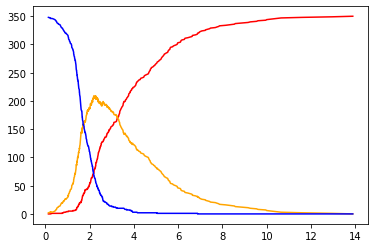

Virus has been eradicated from the population -> steady state


In [2]:
import math
import random
import matplotlib.pyplot as plt


x_inf  = []
x_rec  = []
x_susc = []
x_time = []

# Input parameters ####################

# int; total population
N = 350

# float; maximum elapsed time
T = 100.0

# float; start time
t = 0.0

# float; spatial parameter
V = 100.0

# float; rate of infection after contact
_alpha = 1.0

# float; rate of cure
_beta = 0.5

# int; initial infected population
n_I = 1

#########################################

# Compute susceptible population, set recovered to zero
n_S = N - n_I
n_R = 0

# Initialize results list
SIR_data = []
SIR_data.append((t, n_S, n_I, n_R))

# Main loop
while t < T:
    if n_I == 0:
        break

    w1 = _alpha * n_S * n_I / V
    w2 = _beta * n_I
    W = w1 + w2

    dt = -math.log(random.uniform(0.0, 1.0)) / W
    t = t + dt

    if random.uniform(0.0, 1.0) < w1 / W:
        n_S = n_S - 1
        n_I = n_I + 1
    else:
        n_I = n_I - 1
        n_R = n_R + 1

    SIR_data.append((t, n_S, n_I, n_R))
    x_inf.append(n_I)
    x_susc.append(n_S)
    x_rec.append(n_R)
    x_time.append(t)

with open('SIR_data.txt', 'w+') as fp:
    fp.write('\n'.join('%f %i %i %i' % x for x in SIR_data))
    
# plot all 3 species
plt.plot(x_time, x_rec, color = 'red')
#plt.show()
plt.plot(x_time, x_inf,  color = 'orange')
#plt.show()
plt.plot(x_time, x_susc,  color = 'blue')
plt.savefig("SIR.png", dpi=300, facecolor='white')
plt.show();

if n_I == 0:
    print('Virus has been eradicated from the population -> steady state')



1) **Basic**: 


Which bits are for plotting the output?

Which are the coupled reactions? 

2) **Intermediate**: 

What are the relative rates/probabilities? Why?

What is happening in the loop?

What happens when you change the parameters α and β (alpha and beta)?

Play with different parameter values for alpha and beta. Can you find a model where not everyone was infected and recovered? 


3) **Advanced**:

If you are done and think you understand the SIR model and algorithm, you could also  **think** about how you could combine a movement model with SIR aspects and how you **could** handle that computationally. 


You can use the png file you have generated and compartment models in your portfolio if you wish! Which **learning outcomes** do these relate to? 